# Import librarby :

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install sklearn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore") 

## Data Collection

In [88]:
df=pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')
df.head(3)

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83


## Data Cleaning and Preprocessing

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [90]:
df.describe() # descriptive statistics.

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


### Handling missing values

In [91]:
df.isnull().sum() # No null values

Airline                  0
Source                   0
Source Name              0
Destination              0
Destination Name         0
Departure Date & Time    0
Arrival Date & Time      0
Duration (hrs)           0
Stopovers                0
Aircraft Type            0
Class                    0
Booking Source           0
Base Fare (BDT)          0
Tax & Surcharge (BDT)    0
Total Fare (BDT)         0
Seasonality              0
Days Before Departure    0
dtype: int64

In [92]:
df.duplicated().sum() # no duplicate values 

np.int64(0)

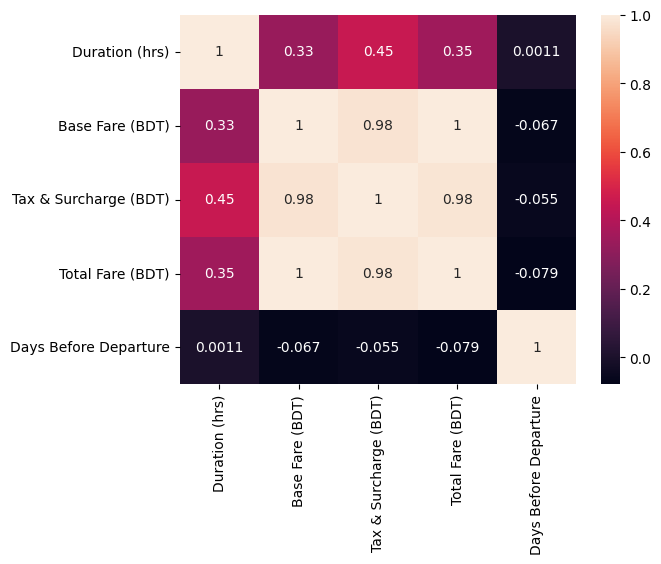

In [93]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

* higly correlation for ["Base Fare","Tax & surecharge","Total Fare","Durations (hrs)"]

# EDA

In [94]:
df.Airline.unique(),df.Airline.nunique()

(array(['Malaysian Airlines', 'Cathay Pacific', 'British Airways',
        'Singapore Airlines', 'IndiGo', 'US-Bangla Airlines', 'AirAsia',
        'Etihad Airways', 'Gulf Air', 'Emirates',
        'Biman Bangladesh Airlines', 'NovoAir', 'FlyDubai', 'Saudia',
        'Thai Airways', 'Kuwait Airways', 'Air India', 'Air Astra',
        'Qatar Airways', 'Air Arabia', 'SriLankan Airlines', 'Vistara',
        'Lufthansa', 'Turkish Airlines'], dtype=object),
 24)

* Total-24 Airlines

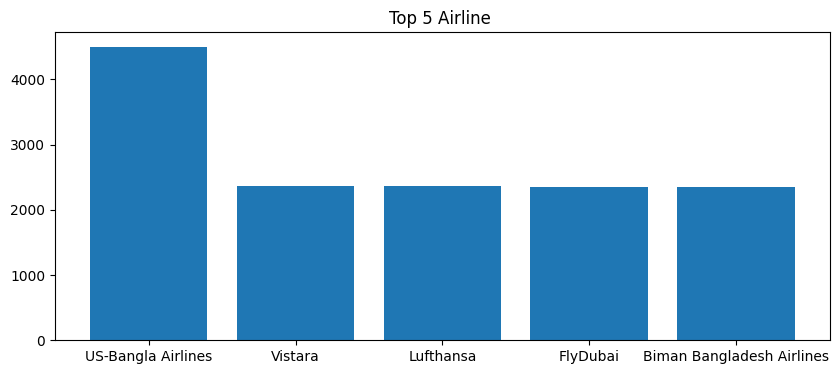

In [95]:
plt.figure(figsize=(10,4))
plt.bar(df.Airline.value_counts(ascending=False).head(5).index,df.Airline.value_counts(ascending=False).head(5).values)
plt.title("Top 5 Airline ")
plt.show()


In [96]:
df['Source Name'].unique(),df['Source Name'].nunique() 

(array(["Cox's Bazar Airport", 'Barisal Airport',
        'Osmani International Airport, Sylhet',
        'Shah Makhdum Airport, Rajshahi', 'Saidpur Airport',
        'Jessore Airport', 'Hazrat Shahjalal International Airport, Dhaka',
        'Shah Amanat International Airport, Chittagong'], dtype=object),
 8)

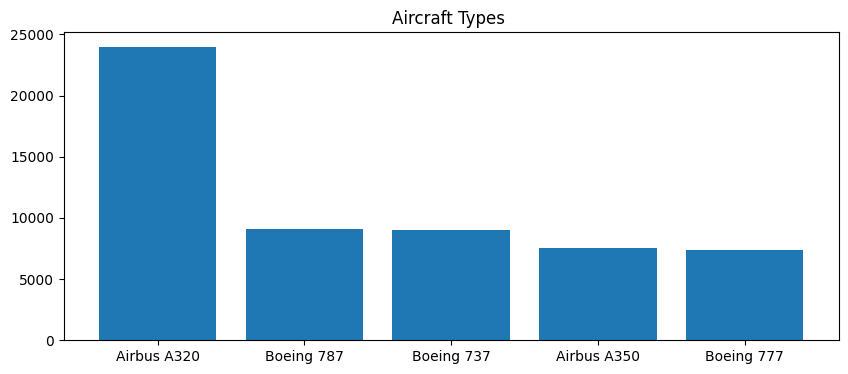

In [97]:
plt.figure(figsize=(10,4))
plt.bar(df['Aircraft Type'].value_counts(ascending=False).index,df['Aircraft Type'].value_counts(ascending=False).values)
plt.title("Aircraft Types ")
plt.show()


In [98]:
df.head(2)

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14


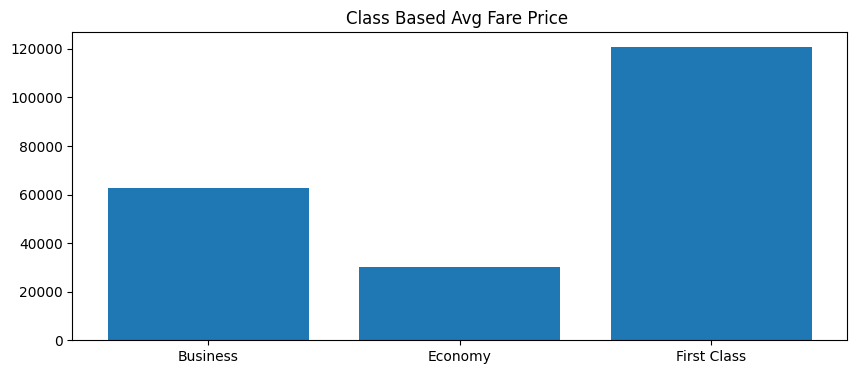

In [99]:
plt.figure(figsize=(10,4))
plt.bar(df.groupby('Class')['Total Fare (BDT)'].agg('mean').index,df.groupby('Class')['Total Fare (BDT)'].agg('mean').values)
plt.title("Class Based Avg Fare Price ")
plt.show()

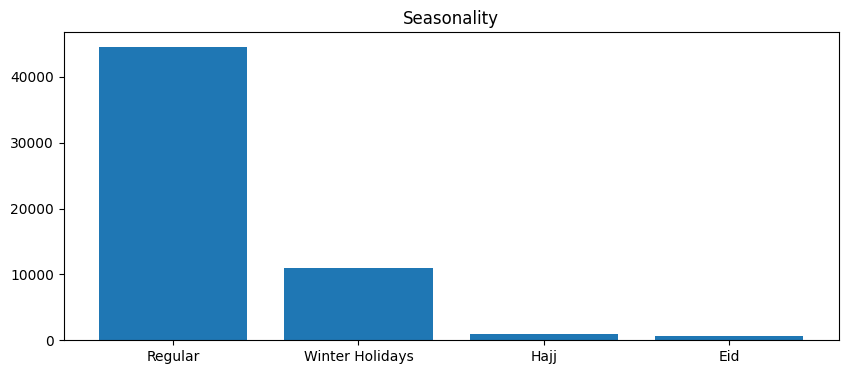

In [100]:
plt.figure(figsize=(10,4))
plt.bar(df['Seasonality'].value_counts().index,df['Seasonality'].value_counts().values)
plt.title("Seasonality")
plt.show()

## Encoding the categorical data

In [101]:
encode_categ_var=df[['Airline','Source Name','Destination Name','Stopovers', 'Aircraft Type', 'Class', 'Booking Source','Seasonality']] 
encode_categ_var

,Airline,Source Name,Destination Name,Stopovers,Aircraft Type,Class,Booking Source,Seasonality
0,Malaysian Airlines,Cox's Bazar Airport,Netaji Subhas Chandra Bose International Airpo...,Direct,Airbus A320,Economy,Online Website,Regular
1,Cathay Pacific,Barisal Airport,"Shah Amanat International Airport, Chittagong",Direct,Airbus A320,First Class,Travel Agency,Regular
2,British Airways,"Osmani International Airport, Sylhet",Kuala Lumpur International Airport,1 Stop,Boeing 787,Economy,Travel Agency,Winter Holidays
3,Singapore Airlines,"Shah Makhdum Airport, Rajshahi","Hazrat Shahjalal International Airport, Dhaka",Direct,Airbus A320,Economy,Direct Booking,Regular
4,British Airways,Saidpur Airport,Toronto Pearson International Airport,1 Stop,Airbus A350,Business,Direct Booking,Regular
...,...,...,...,...,...,...,...,...
56995,Kuwait Airways,Jessore Airport,Netaji Subhas Chandra Bose International Airpo...,Direct,Airbus A320,Business,Online Website,Regular
56996,Kuwait Airways,"Shah Amanat International Airport, Chittagong",Netaji Subhas Chandra Bose International Airpo...,Direct,Airbus A320,First Class,Online Website,Regular
56997,Biman Bangladesh Airlines,Cox's Bazar Airport,Jessore Airport,Direct,Airbus A320,Economy,Direct Booking,Regular
56998,British Airways,Saidpur Airport,Toronto Pearson International Airport,1 Stop,Airbus A350,Economy,Direct Booking,Regular


In [102]:
le=LabelEncoder()
for i in encode_categ_var:
    encode_categ_var[i]=le.fit_transform(encode_categ_var[i])

In [103]:
encode_categ_var

,Airline,Source Name,Destination Name,Stopovers,Aircraft Type,Class,Booking Source,Seasonality
0,14,1,12,2,0,1,1,2
1,6,0,15,2,0,2,2,2
2,5,4,10,0,4,1,2,3
3,18,7,4,2,0,1,0,2
4,5,5,19,0,1,0,0,2
...,...,...,...,...,...,...,...,...
56995,12,3,12,2,0,0,1,2
56996,12,6,12,2,0,2,1,2
56997,4,1,7,2,0,1,0,2
56998,5,5,19,0,1,1,0,2


In [104]:
for i in encode_categ_var:
    df[i]=encode_categ_var[i]

In [105]:
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,14,CXB,1,CCU,12,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,2,0,1,1,21131.225021,5169.683753,26300.908775,2,10
1,6,BZL,0,CGP,15,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,2,0,2,2,11605.395471,200.000000,11805.395471,2,14
2,5,ZYL,4,KUL,10,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,0,4,1,2,39882.499349,11982.374902,51864.874251,3,83
3,18,RJH,7,DAC,4,2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,2,0,1,0,4435.607340,200.000000,4635.607340,2,56
4,5,SPD,5,YYZ,19,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,0,1,0,0,59243.806146,14886.570922,74130.377068,2,90


# Splitting the dataset

In [106]:
df.head(2)

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,14,CXB,1,CCU,12,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,2,0,1,1,21131.225021,5169.683753,26300.908775,2,10
1,6,BZL,0,CGP,15,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,2,0,2,2,11605.395471,200.000000,11805.395471,2,14


In [107]:
df.columns

Index(['Airline', 'Source', 'Source Name', 'Destination', 'Destination Name',
       'Departure Date & Time', 'Arrival Date & Time', 'Duration (hrs)',
       'Stopovers', 'Aircraft Type', 'Class', 'Booking Source',
       'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)',
       'Seasonality', 'Days Before Departure'],
      dtype='object')

In [108]:
x=df[['Airline','Source Name','Destination Name','Duration (hrs)','Stopovers','Aircraft Type','Class','Booking Source','Base Fare (BDT)','Tax & Surcharge (BDT)','Seasonality', 'Days Before Departure']]
y=df['Total Fare (BDT)']

In [114]:
x=StandardScaler().fit_transform(x)

In [115]:
x,y

(array([[ 0.29437589, -1.09444022,  0.42725869, ..., -0.51785149,
         -0.32347498, -1.36305958],
        [-0.83495289, -1.5312905 ,  0.94953128, ..., -0.92774808,
         -0.32347498, -1.20930466],
        [-0.97611899,  0.2161106 ,  0.07907696, ...,  0.04405526,
          1.77605517,  1.44296763],
        ...,
        [-1.11728509, -1.09444022, -0.44319564, ..., -0.92774808,
         -0.32347498, -0.90179483],
        [-0.97611899,  0.65296087,  1.64589474, ...,  0.05668826,
         -0.32347498, -0.97867229],
        [-1.39961729, -0.65758995,  1.12362214, ..., -0.92774808,
         -0.32347498, -1.5168145 ]], shape=(57000, 12)),
 0         26300.908775
 1         11805.395471
 2         51864.874251
 3          4635.607340
 4         74130.377068
              ...      
 56995     93970.642511
 56996    224492.068918
 56997      4575.365554
 56998     53039.143091
 56999      6031.070839
 Name: Total Fare (BDT), Length: 57000, dtype: float64)

* `Independent variable` is float value so use only `regression Algorithom `

#### `A random forest` is an `ensemble learning` method that combines the predictions from `multiple decision trees to produce a more accurate and stable prediction`. so i choose Random forest

In [116]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y) # split train and test dataset

In [117]:
rg=RandomForestRegressor(n_estimators=100,random_state=123) # estimaters given 100 means take 100 desion tree in side 
rg.fit(xtrain,ytrain) # Train the model

RandomForestRegressor(random_state=123)

In [118]:
ypre=rg.predict(xtest)# test the Model 

In [119]:
r2_score(ytest,ypre) # model Score 

0.9999739047668742

* Our Model is score is 99.9 is best score so no need to Cross-validation 

In [122]:
xtest[0]

array([-1.25845119,  0.65296087, -1.66183169, -0.70405281,  0.72529246,
       -0.97102433,  1.22504885,  0.00403774, -0.71174   , -0.92774808,
       -0.32347498,  0.78950924])

In [123]:
rg.predict(xtest[0].reshape(1,-1))

array([10104.31150387])

In [125]:
ytest.iloc[0]

np.float64(10103.367574261982)